In [ ]:
conda install -c anaconda gensim

In [9]:
from gensim.models import Word2Vec
# define training data
sentences = [['this','product','is', 'good', 'and', 'i','like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]


#min_count - consider a word that occurs atleast once in any documents of documents corpus
#size - dimention in which word has to be represented
model = Word2Vec(sentences, min_count=1,size=2)# train model
# summarize vocabulary
words = list(model.wv.vocab)
print('Word2Vec feature_names:\n', words)
# access vector for one word
print('2d vector value of word \"like\":',model.wv['like'])#get the vector value of word 'like'
print('Similar words w.r.t "like":',model.most_similar('like'))

Column Features:
 ['this', 'product', 'is', 'good', 'and', 'i', 'like', 'very', 'much', 'nice', 'hate', 'the', 'phone', 'works', 'well', 'dislike']
2d vector value of word "like": (2,)
Similar words w.r.t "like": [('nice', 0.9388697147369385), ('hate', 0.8988867402076721), ('dislike', 0.8549845814704895), ('phone', 0.6541223526000977), ('this', 0.5659125447273254), ('much', 0.48574450612068176), ('well', 0.22928395867347717), ('product', 0.14647570252418518), ('is', 0.11507090926170349), ('works', -0.061796724796295166)]


<ipython-input-9-0d6ba6e5a90d>:15: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print('Similar words w.r.t "like":',model.most_similar('like'))


<ipython-input-5-a1d527518e20>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


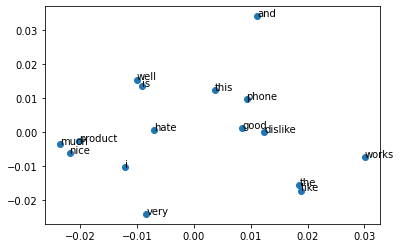

In [5]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'product', 'is', 'good', 'and', 'i', 'like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
# train model
model = Word2Vec(sentences, min_count=1,size=50)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
#Training using google news & google docs
#Caution: It requires 12GB of RAM
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']
------------------------------------------------
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
result = model.most_similar('king')#get the vector value of word 'king'
print(result)

In [4]:
import pandas as pd
from gensim.models import Word2Vec
import gensim
data=pd.read_csv('word2vec_AmazonMobileDataCleanedFinal.csv')
sentence_list=[]
for sent in data['cleanedtext']:
    sentence_list.append(sent.split(' '))
w2v_model= gensim.models.Word2Vec(sentence_list,min_count=1,size=50)
print(w2v_model.wv.most_similar('great'))

[('fantastic', 0.8816647529602051), ('good', 0.8496969938278198), ('wonderful', 0.8284097909927368), ('excellent', 0.8274784088134766), ('awesome', 0.8117212057113647), ('perfect', 0.8038425445556641), ('amazing', 0.7925463914871216), ('nice', 0.7681457996368408), ('decent', 0.7595925331115723), ('ok', 0.7212443947792053)]


In [5]:
print(w2v_model.wv.most_similar('mobile'))

[('virgin', 0.7649283409118652), ('boost', 0.7594709396362305), ('cellular', 0.7279979586601257), ('providers', 0.7179362177848816), ('verizons', 0.7119923233985901), ('metropcs', 0.7091587781906128), ('tmo', 0.701468825340271), ('towers', 0.6981723308563232), ('prepaid', 0.6909446120262146), ('tracfone', 0.688508152961731)]


In [6]:
#https://medium.com/@ranasinghiitkgp/featurization-of-text-data-bow-tf-idf-avgw2v-tfidf-weighted-w2v-7a6c62e8b097

#convert each document to average word2vec
import numpy as np
from gensim.models import Word2Vec
sentences = [['this','product','is', 'good', 'and', 'i','like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
model = Word2Vec(sentences, min_count=1,size=2)
sent_vectors = []; 
for sent in (sentences): 
    sent_vec = np.zeros(2) 
    cnt_words =0 
    for word in sent: 
        if word in list(model.wv.vocab):
            vec = model.wv[word]
            print(f'2d vector value of "{word}" is {vec}')
            sent_vec += vec
            #print(sent_vec)
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
        #print(sent_vec)
    sent_vectors.append(sent_vec)
print('No of documents in document corpus:', len(sent_vectors))
print('average word2vec of each document in document corpus:',sent_vectors)
print('Shape of average word2vec of each document in document corpus:',np.asarray(sent_vectors).shape)

2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "product" is [-0.03655922 -0.13222961]
2d vector value of "is" is [-0.04805691 -0.0415631 ]
2d vector value of "good" is [-0.24928075 -0.02148832]
2d vector value of "and" is [0.23667577 0.19833177]
2d vector value of "i" is [-0.15281524 -0.08101246]
2d vector value of "like" is [0.09192023 0.08572356]
2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "very" is [-0.10462771  0.06809384]
2d vector value of "much" is [-0.2173633   0.23203114]
2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "product" is [-0.03655922 -0.13222961]
2d vector value of "is" is [-0.04805691 -0.0415631 ]
2d vector value of "nice" is [ 0.04378988 -0.22248162]
2d vector value of "i" is [-0.15281524 -0.08101246]
2d vector value of "hate" is [ 0.17684528 -0.03167853]
2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "product" is [-0.03655922 -0.13222961]
2d vector value 

In [7]:
#convert each document to TFIDF word2vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

data=pd.read_csv('TFIDF_data.csv')
sentences=[]
for sent in data['test'].values:
    senten= ' '.join(e for e in sent.split())
    sentences.append(senten.lower().strip())

sentence_list=[]
for sent in sentences:
    sentence_list.append(sent.split(' '))

model = Word2Vec(sentence_list, min_count=1,size=2)#list of lists of strings as input

tfidf = TfidfVectorizer()
tfidf.fit(sentences)#Vectorizer accepts list of strings as input

dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))


tfidf_feat = tfidf.get_feature_names() 
w2v_feat=list(model.wv.vocab)
print('Word2Vec feature_names:\n',w2v_feat)
print('TFIDF feature_names:\n',tfidf_feat)

row=0
tfidf_sent_vectors = []; 
for sent in (sentence_list): 
    sent_vec = np.zeros(2) 
    weight_sum =0; 
    for word in sent: 
        if word in list(model.wv.vocab) and word in tfidf_feat:
            vec = model.wv[word]
            print(f'2d vector value of "{word}" is {vec}')
            # tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # (sent.count(word)/len(sent)) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
print('No of documents in document corpus:',row)
print('TFIDF word2vec of each document in document corpus:',tfidf_sent_vectors)
print('Shape of TFIDF word2vec of each document in document corpus:',np.asarray(tfidf_sent_vectors).shape)

Word2Vec feature_names:
 ['this', 'mobile', 'is', 'good', 'not', 'works', 'fine', 'and', 'affordable', 'cheap', 'best']
TFIDF feature_names:
 ['affordable', 'and', 'best', 'cheap', 'fine', 'good', 'is', 'mobile', 'not', 'this', 'works']
2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "mobile" is [-0.1580383  -0.20344922]
2d vector value of "is" is [-0.0481459  -0.04151163]
2d vector value of "good" is [-0.2493533  -0.02149457]
2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "mobile" is [-0.1580383  -0.20344922]
2d vector value of "is" is [-0.0481459  -0.04151163]
2d vector value of "not" is [-0.16938859  0.12842542]
2d vector value of "good" is [-0.2493533  -0.02149457]
2d vector value of "this" is [-0.19044496 -0.20208769]
2d vector value of "mobile" is [-0.1580383  -0.20344922]
2d vector value of "works" is [0.0706987  0.01953087]
2d vector value of "fine" is [-0.17548512 -0.17923826]
2d vector value of "and" is [0.23662041 0.198354

In [8]:
type(np.asarray(tfidf_sent_vectors))

numpy.ndarray